In [280]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [224]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')


In [225]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [226]:
data.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [227]:
data.shape

(158, 12)

In [228]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [230]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [231]:
df_features=data.drop(['Dystopia Residual','Country','Region'],axis=1)


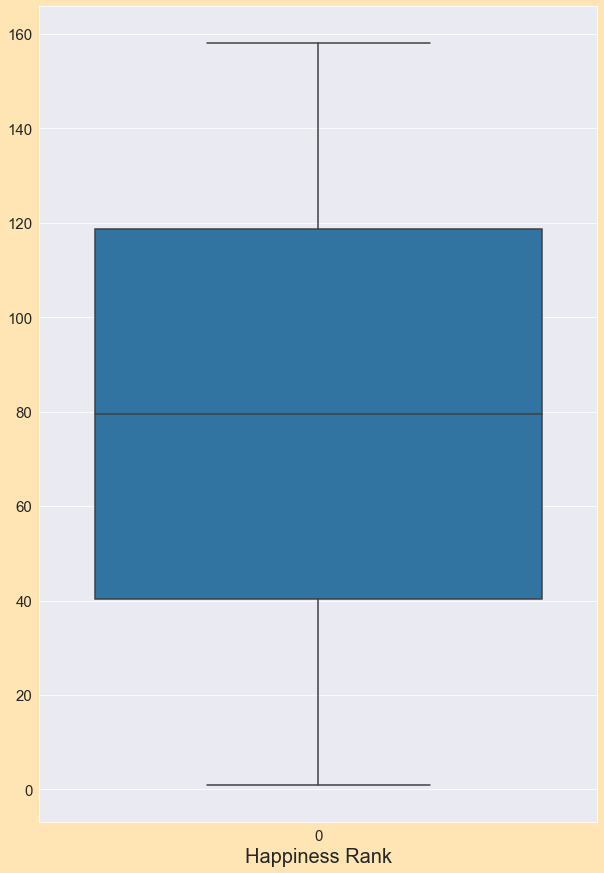

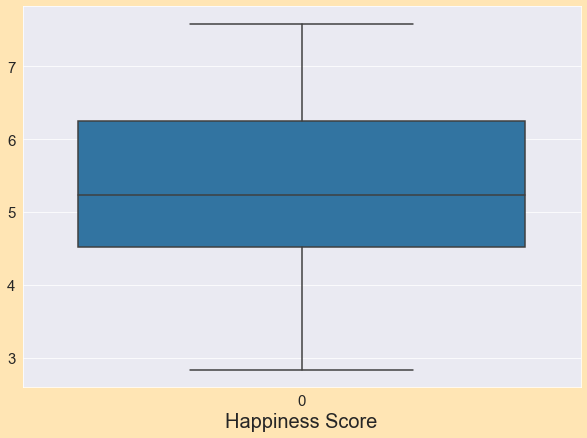

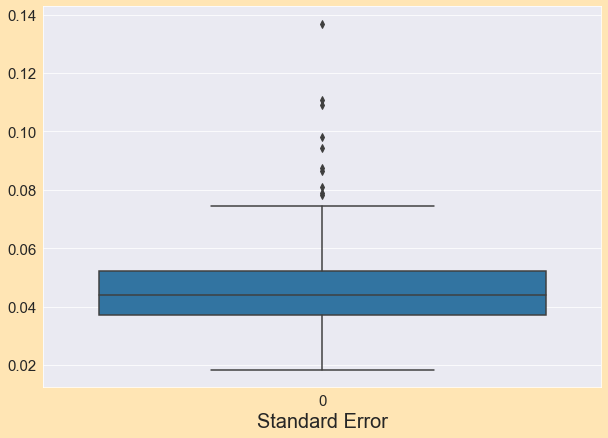

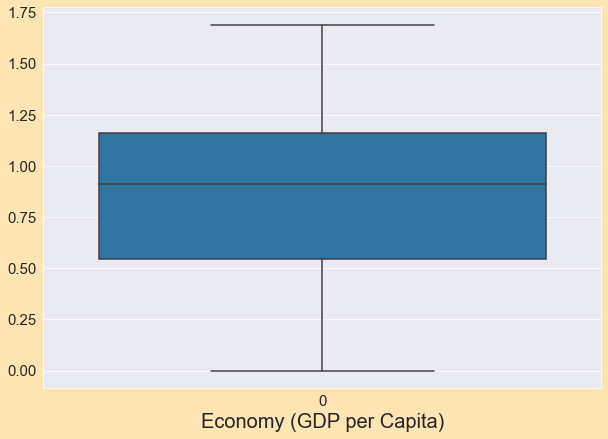

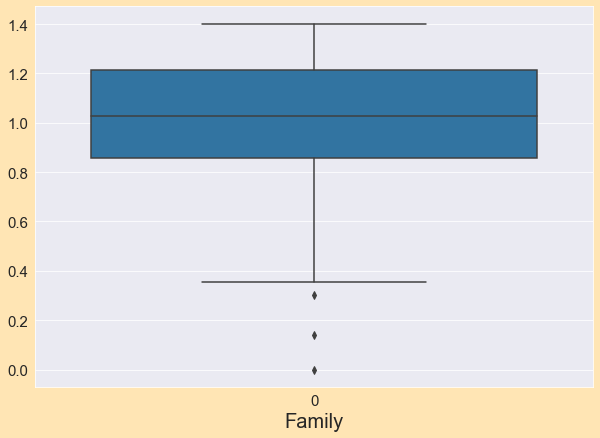

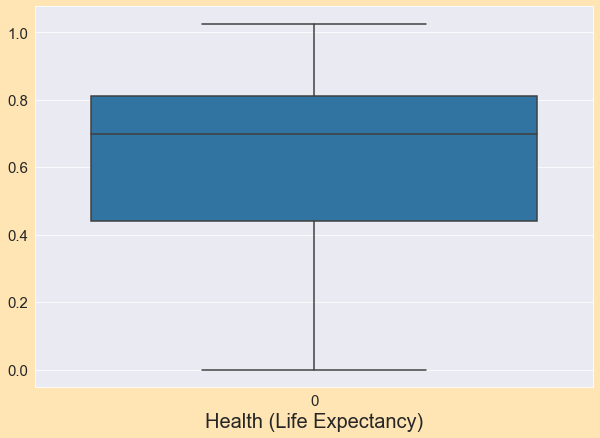

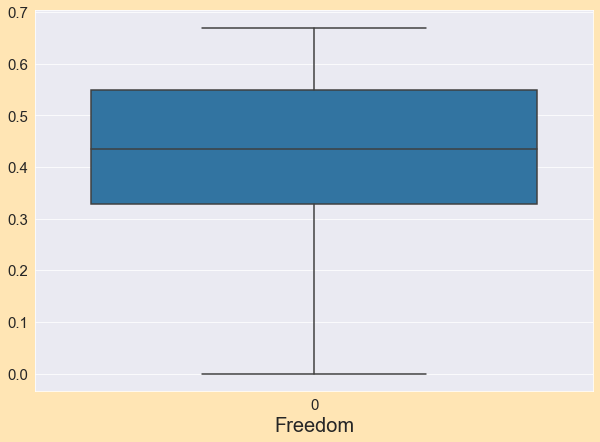

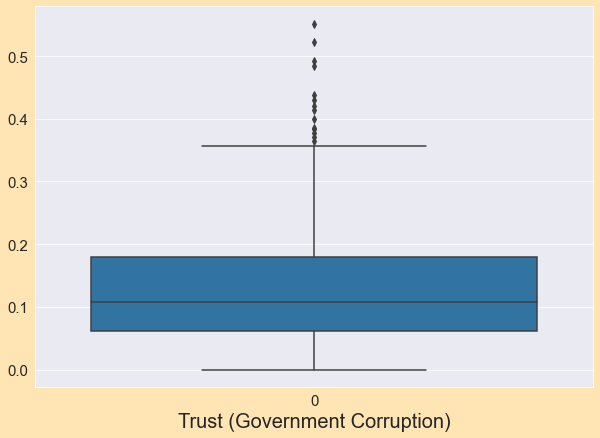

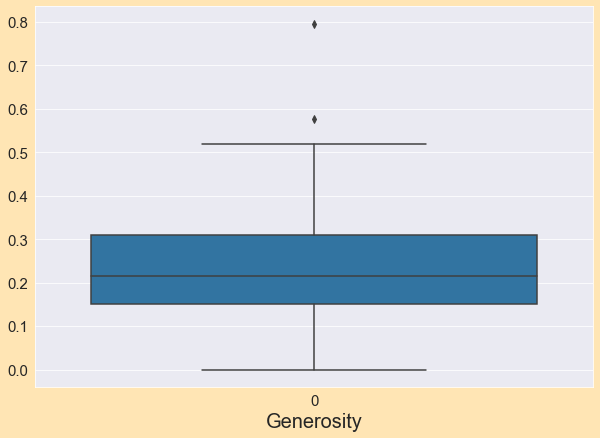

In [232]:
plt.figure(figsize=(10,15))
graph=1
for column in df_features:
    if graph<=12:
        #plt.subplot(2,6,graph)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=20)
     
    graph+=1
    plt.show()

In [233]:
data.drop_duplicates(inplace=True)
data.shape

(158, 12)

In [234]:
sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(10,7)
plt.rcParams['figure.facecolor']='#FFE5B4'# peach colour background is for this hashtag code

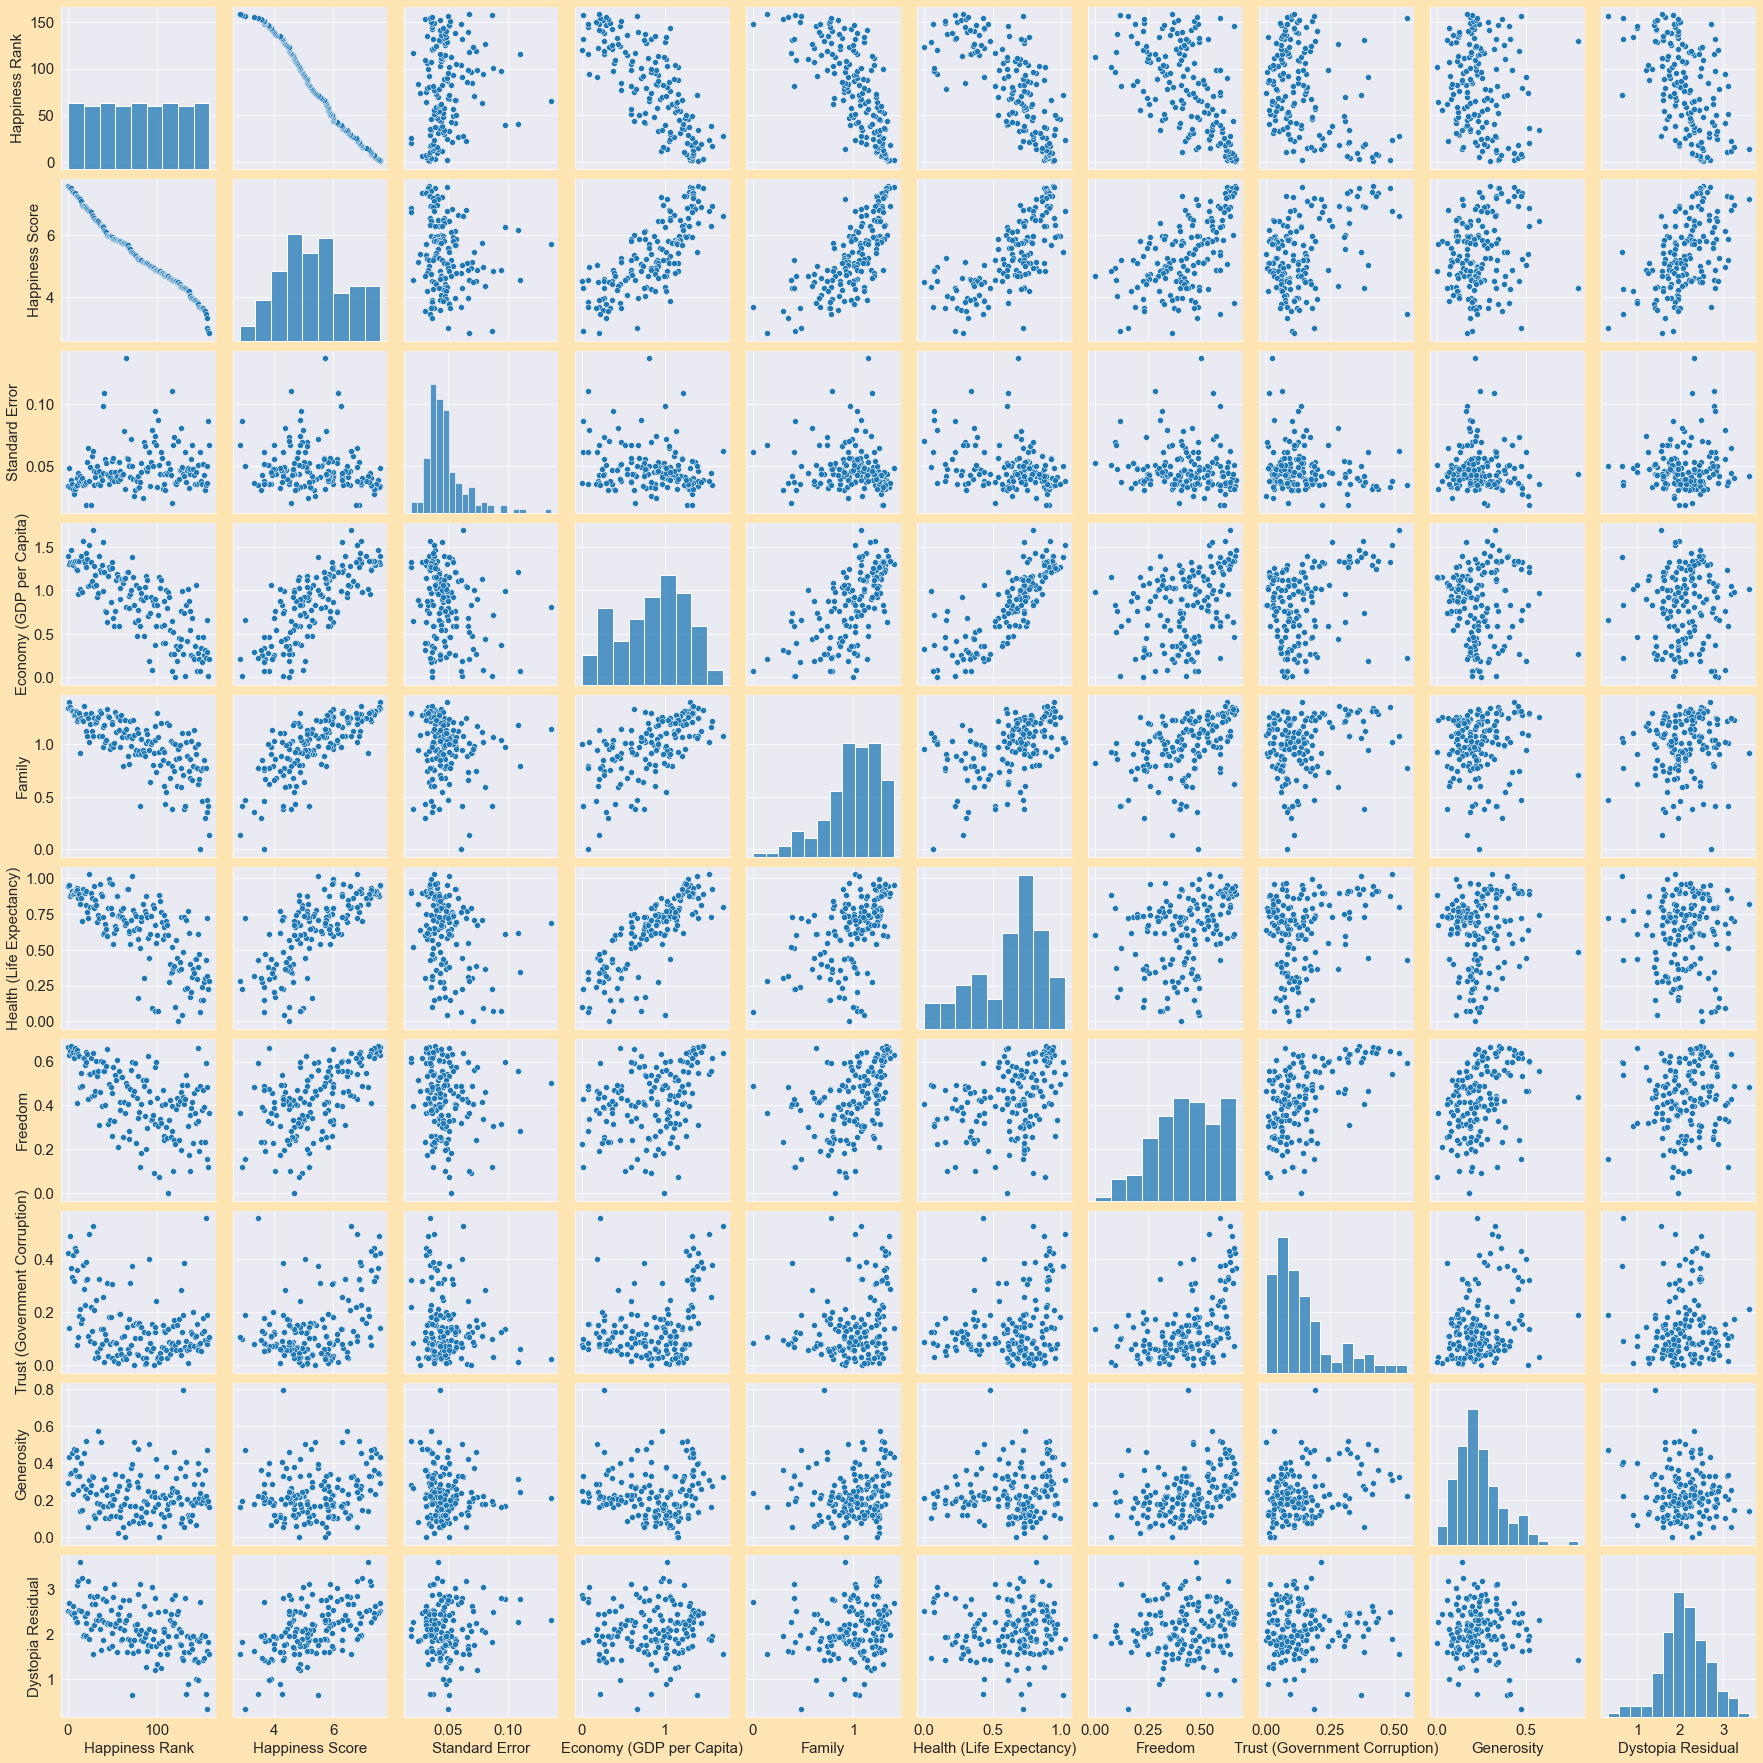

In [235]:
sns.pairplot(data)

In [236]:
gdp_region=data.groupby('Region')['Economy (GDP per Capita)'].sum()
gdp_region

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: Economy (GDP per Capita), dtype: float64

Text(0, 0.5, '')

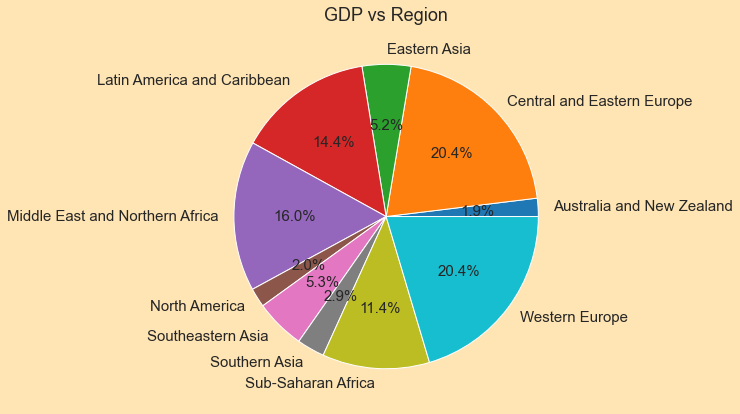

In [237]:
gdp_region.plot.pie(autopct='%1.1f%%')
plt.title('GDP vs Region')
plt.ylabel('')

WESTERN EUROPE , CENTRAL AND EASTERN EUROPE ARE HIGHLY CONTRIBUTING IN THE CASE OF GDP

In [238]:
#TOTAL COUNTRY COUNT IN A REGION
total_country=data.groupby('Region')[['Country']].count()
total_country

,Country
Region,
Australia and New Zealand,2
Central and Eastern Europe,29
Eastern Asia,6
Latin America and Caribbean,22
Middle East and Northern Africa,20
North America,2
Southeastern Asia,9
Southern Asia,7
Sub-Saharan Africa,40


# CORRUPTION IN REGIONS

In [239]:
#corruption in region
corruption=data.groupby('Region')[['Trust (Government Corruption)']].mean()
corruption

,Trust (Government Corruption)
Region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


Text(0.5, 1.0, 'Corruption in regions')

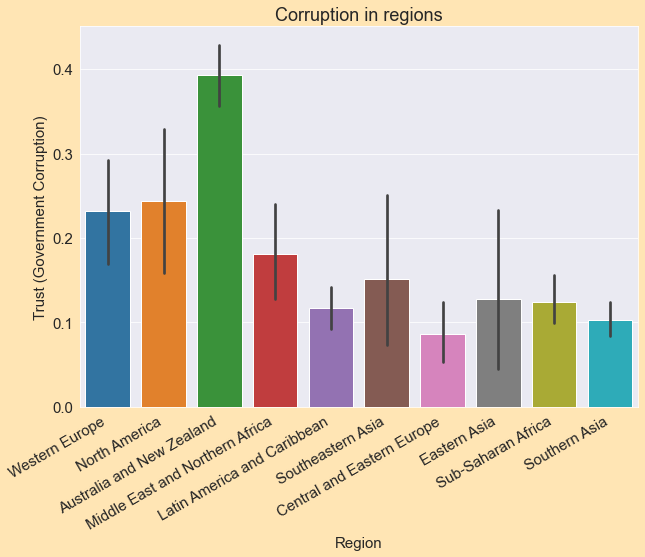

In [240]:
sns.barplot(x=data['Region'],y=data['Trust (Government Corruption)'],data=data)
plt.xticks(rotation=30,ha='right')
plt.title('Corruption in regions')

# COUNTRY VS LIFE EXPECTANCY

In [241]:
sorted_data = data.sort_values(by='Happiness Score', ascending=False)
top_10_countries = sorted_data.head(10)
print(top_10_countries[['Country','Health (Life Expectancy)']])

       Country  Health (Life Expectancy)
0  Switzerland                   0.94143
1      Iceland                   0.94784
2      Denmark                   0.87464
3       Norway                   0.88521
4       Canada                   0.90563
5      Finland                   0.88911
6  Netherlands                   0.89284
7       Sweden                   0.91087
8  New Zealand                   0.90837
9    Australia                   0.93156


Text(0.5, 1.0, 'life expentency')

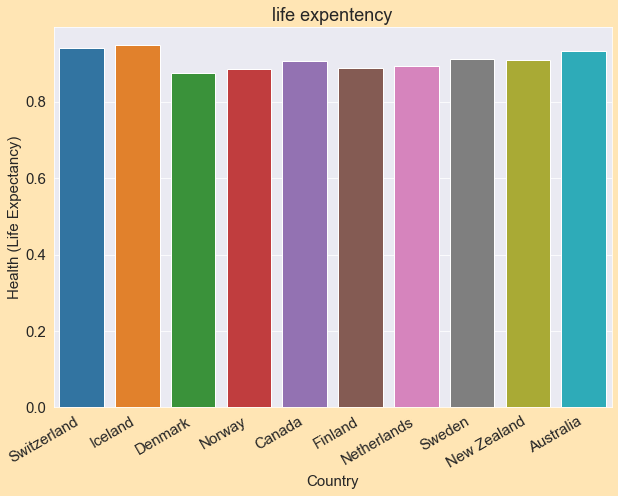

In [242]:
sns.barplot(x=top_10_countries['Country'],y=top_10_countries['Health (Life Expectancy)'],data=data)
plt.xticks(rotation=30,ha='right')
plt.title('life expentency')

IN switzerland one can survive more than 80 years

In [243]:
sorted_data = data.sort_values(by='Happiness Score', ascending=False)
bottom_10_countries = sorted_data.tail(10)
print(bottom_10_countries[['Country','Health (Life Expectancy)']])

          Country  Health (Life Expectancy)
148          Chad                   0.15010
149        Guinea                   0.24009
150   Ivory Coast                   0.15185
151  Burkina Faso                   0.27125
152   Afghanistan                   0.30335
153        Rwanda                   0.42864
154         Benin                   0.31910
155         Syria                   0.72193
156       Burundi                   0.22396
157          Togo                   0.28443


Text(0.5, 1.0, 'life expentency')

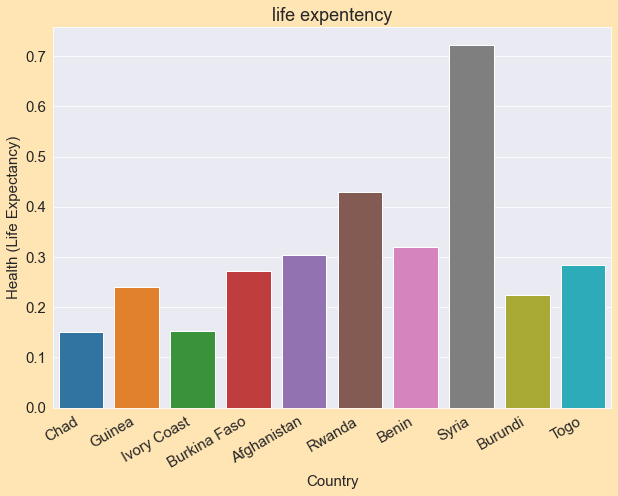

In [244]:
sns.barplot(x=bottom_10_countries['Country'],y=bottom_10_countries['Health (Life Expectancy)'],data=data)
plt.xticks(rotation=30,ha='right')
plt.title('life expentency')

Chad has the least life expectancy,here one can only 15 years

# CORRUPTION VS TOP 10 AND BOTTOM 10 COUNTRIES

In [245]:
sorted_data = data.sort_values(by='Trust (Government Corruption)', ascending=False)
countries = sorted_data.tail(10)
print(countries[['Country','Trust (Government Corruption)']])

                    Country  Trust (Government Corruption)
64                  Jamaica                        0.02299
51                  Moldova                        0.01615
101                  Greece                        0.01397
40      Trinidad and Tobago                        0.01140
87                 Portugal                        0.01078
55                Lithuania                        0.01031
133                Bulgaria                        0.00872
85                  Romania                        0.00649
95   Bosnia and Herzegovina                        0.00227
73                Indonesia                        0.00000


Text(0.5, 1.0, 'lowest rate of corruption in countries')

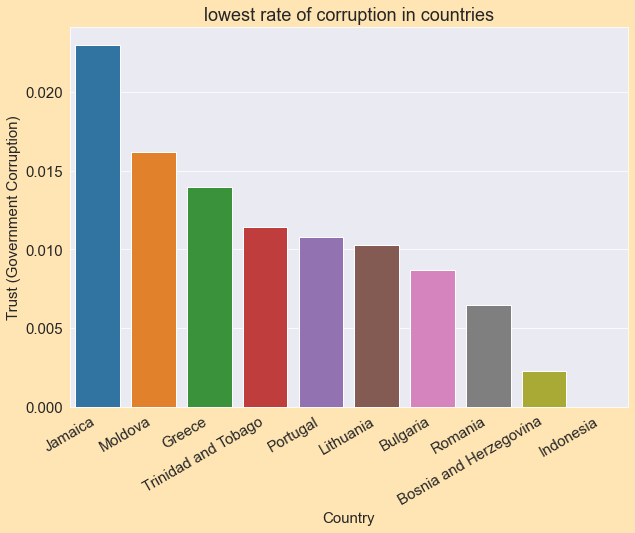

In [246]:
sns.barplot(x=countries['Country'],y=countries['Trust (Government Corruption)'],data=data)
plt.xticks(rotation=30,ha='right')
plt.title('lowest rate of corruption in countries')

INDONESIA HAS THE LEAST CORRUPTION

In [247]:
sorted_data = data.sort_values(by='Trust (Government Corruption)', ascending=False)
countries = sorted_data.head(10)
print(countries[['Country','Trust (Government Corruption)']])

                  Country  Trust (Government Corruption)
153                Rwanda                        0.55191
27                  Qatar                        0.52208
23              Singapore                        0.49210
2                 Denmark                        0.48357
7                  Sweden                        0.43844
8             New Zealand                        0.42922
0             Switzerland                        0.41978
5                 Finland                        0.41372
90      Somaliland region                        0.39928
19   United Arab Emirates                        0.38583


Text(0.5, 1.0, 'lowest rate of corruption in countries')

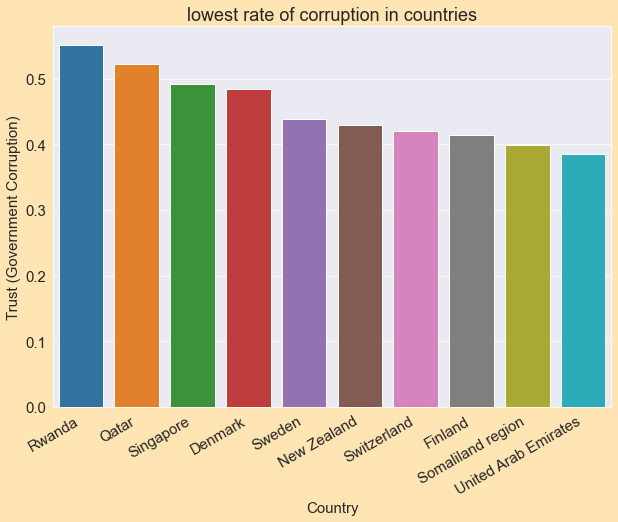

In [248]:
sns.barplot(x=countries['Country'],y=countries['Trust (Government Corruption)'],data=data)
plt.xticks(rotation=30,ha='right')
plt.title('lowest rate of corruption in countries')

RWANDA HAS THE GREATEST CORRUPTION

In [249]:
data.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


# CHECKING THE CO RELATION 

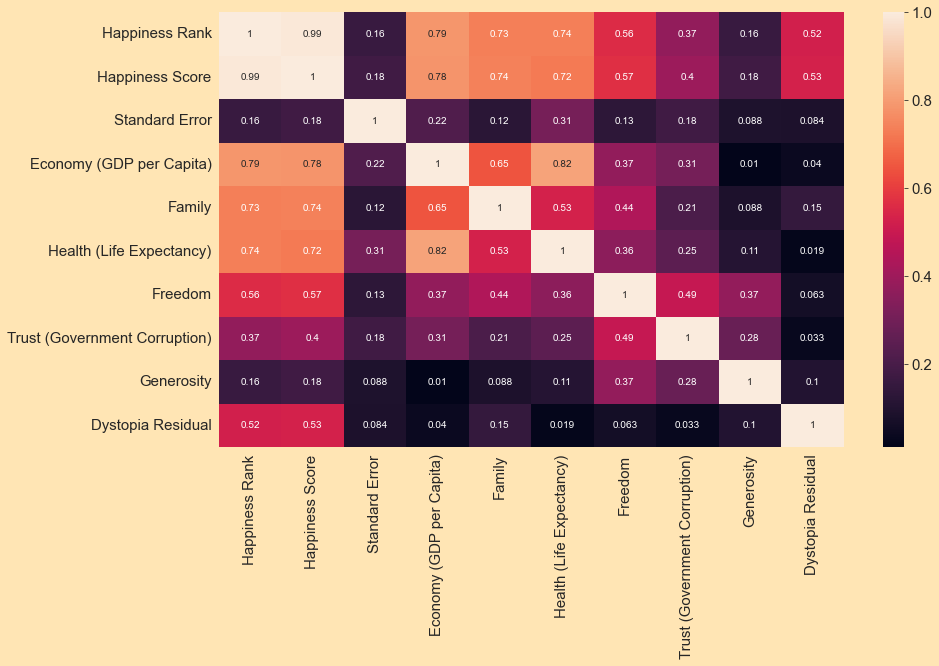

In [250]:
df_corr=data.corr().abs()
plt.figure(figsize=(14,8))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

Happiness rank,family,GDP,life expentency are highly contributing features.But we will not remove others feature as we saw from the analysis they are also imoacting the results.

In [266]:
X=data.drop(columns =['Happiness Score','Country','Region'])
y=data['Happiness Score']

# CHECKING THE SKEWNESS

In [252]:
data.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

# TREATING SKEWNESS 

In [253]:
from scipy.stats import boxcox

In [254]:
data['Standard Error']=boxcox(data['Standard Error'],0)

In [255]:
data.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   0.484623
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Box cox only treats the positive values. we used power transformation technique because we don't want to loose the important data as well as want to remove skewness.

In [256]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

# Splitting in train and test dataset

In [268]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state=43)
#print('Training feature matrix size:',X_train.shape)
#print('Training target vector size:',Y_train.shape)
#print('Test feature matrix size:',X_test.shape)
#print('Test target vector size:',Y_test.shape)

# LINEAR REGRESSION

In [281]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred1=lr.predict(X_test)
r2_score(y_test,y_pred1)

0.9999999292352513

# SVM

In [282]:
svm=SVR()
svm.fit(X_train,y_train)
y_pred2=svm.predict(X_test)
r2_score(y_test,y_pred2)

0.9877393449877839

# RANDOM FOREST

In [283]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred3=rf.predict(X_test)
r2_score(y_test,y_pred3)

0.9956676385529757

# ADABOOST

In [284]:
ada=AdaBoostRegressor()
ada.fit(X_train,y_train) 
y_pred4=ada.predict(X_test)
r2_score(y_test,y_pred4)

0.9923598569864038

In [290]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import sklearn.metrics as metrics

# EVALUATING THE MODELS

In [293]:
#MSE
MSE1=metrics.mean_squared_error(y_test,y_pred1)
MSE2=metrics.mean_squared_error(y_test,y_pred2)
MSE3=metrics.mean_squared_error(y_test,y_pred3)
MSE4=metrics.mean_squared_error(y_test,y_pred4)
print(MSE1,MSE2,MSE3,MSE4)

8.99406069998739e-08 0.015583051934088609 0.005506346386792302 0.009710471850493344


In [294]:
#MAE
MAE1=metrics.mean_absolute_error(y_test,y_pred1)
MAE2=metrics.mean_absolute_error(y_test,y_pred2)
MAE3=metrics.mean_absolute_error(y_test,y_pred3)
MAE4=metrics.mean_absolute_error(y_test,y_pred4)


print(MAE1,MAE2,MAE3,MAE4)

0.0002650110980697562 0.07290760457181752 0.04124056603773564 0.06485265950755613


We can see that linear regression works very well as its R2 score is high,besides the mse and mae is also less for this model.. So we will use this model.

# CROSS VALIDATION

In [295]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X, Y, cv = 5)
print('\033[1m'+'Cross Validation Score :'+'\033[0m\n')
print("Score :" ,score)
print("Mean Score :",score.mean())
print("Std deviation :",score.std())

Cross Validation Score :

Score : [0.99999946 0.99999839 0.99999831 0.9999954  0.99999945]
Mean Score : 0.9999982026146931
Std deviation : 1.4854425278828705e-06


# SAVING THE MODEL

In [296]:
import joblib
joblib.dump(lin_reg,'lin_reg.obj')

['lin_reg.obj']